In [32]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GaussianNoise, GlobalMaxPooling2D
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators for train and test sets
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directory in batches
Xtrain= train_datagen.flow_from_directory(
    directory='/Users/sukanya/Downloads/dataset_fracture/train',
    target_size=(256, 256),
    batch_size=100,
    class_mode='binary'
)

Xtest = test_datagen.flow_from_directory(
    directory='/Users/sukanya/Downloads/dataset_fracture/val',
    target_size=(256, 256),
    batch_size=100,
    class_mode='binary'
)

# Optionally, if you want to convert class labels to integers
class_indices = train_generator.class_indices
train_dataset = (train_generator, class_indices)
test_dataset = (test_generator, class_indices)


Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [34]:
class_indices = Xtrain.class_indices
class_names = list(class_indices.keys())
print(class_names)

['fractured', 'not fractured']


In [35]:
import tensorflow as tf

# Define a function to normalize images
def process(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

# Convert DirectoryIterator objects to tf.data.Dataset objects
train_dataset = tf.data.Dataset.from_generator(
    lambda: Xtrain,
    output_signature=(
        tf.TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

test_dataset = tf.data.Dataset.from_generator(
    lambda: Xtest,
    output_signature=(
        tf.TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int32)
    )
)

# Apply normalization using the map function
x_train = train_dataset.map(process)
x_test = test_dataset.map(process)



In [36]:
input_shape = (256, 256, 3)

In [37]:
#Model
model = Sequential()
model.add(Conv2D(32, (2, 2),activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (2, 2),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (2, 2),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 255, 255, 32)      416       
                                                                 
 batch_normalization_3 (Bat  (None, 255, 255, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      4128      
                                                                 
 batch_normalization_4 (Bat  (None, 126, 126, 32)     

In [39]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [45]:
batch_size = min(100, len(Xtrain))
history = model.fit(Xtrain, epochs=10, batch_size=batch_size, validation_data=Xtest)

Epoch 1/10
89/89 [==============================] - 81s 907ms/step - loss: 0.6343 - accuracy: 0.6015 - val_loss: 4.8761 - val_accuracy: 0.6000
Epoch 2/10
89/89 [==============================] - 80s 900ms/step - loss: 0.6077 - accuracy: 0.6477 - val_loss: 2.6565 - val_accuracy: 0.6583
Epoch 3/10
89/89 [==============================] - 80s 902ms/step - loss: 0.5673 - accuracy: 0.6920 - val_loss: 13.1117 - val_accuracy: 0.6000
Epoch 4/10
89/89 [==============================] - 82s 921ms/step - loss: 0.5339 - accuracy: 0.7233 - val_loss: 6.6591 - val_accuracy: 0.6000
Epoch 5/10
89/89 [==============================] - 81s 910ms/step - loss: 0.5193 - accuracy: 0.7371 - val_loss: 6.0044 - val_accuracy: 0.5950
Epoch 6/10
89/89 [==============================] - 81s 909ms/step - loss: 0.4934 - accuracy: 0.7643 - val_loss: 3.1407 - val_accuracy: 0.5933
Epoch 7/10
89/89 [==============================] - 85s 954ms/step - loss: 0.4602 - accuracy: 0.7864 - val_loss: 2.4963 - val_accuracy: 0.585

In [51]:
y_test = Xtest.classes

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have model predictions and true labels
predictions = model.predict(Xtest)
predicted_labels = (predictions > 0.5).astype(int)
true_labels = y_test

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

6/6 [==============================] - 1s 202ms/step
Accuracy: 0.53
Precision: 0.4216417910447761
Recall: 0.4708333333333333
F1-score: 0.4448818897637795


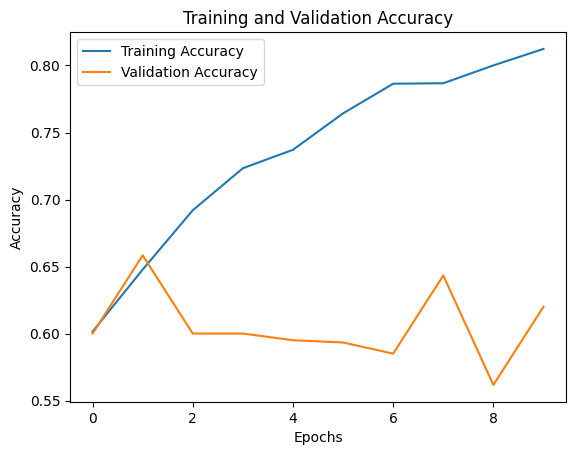

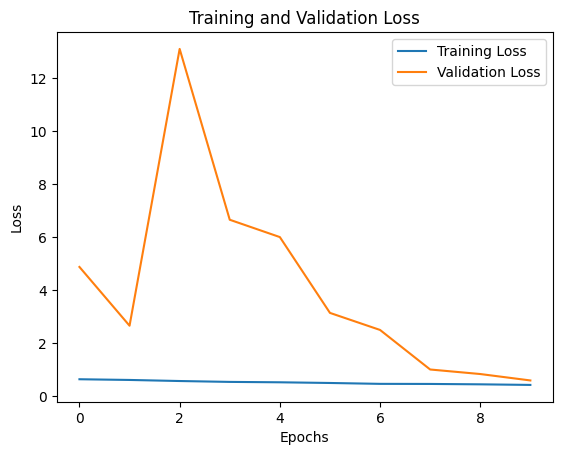

In [62]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

6/6 [==============================] - 1s 207ms/step


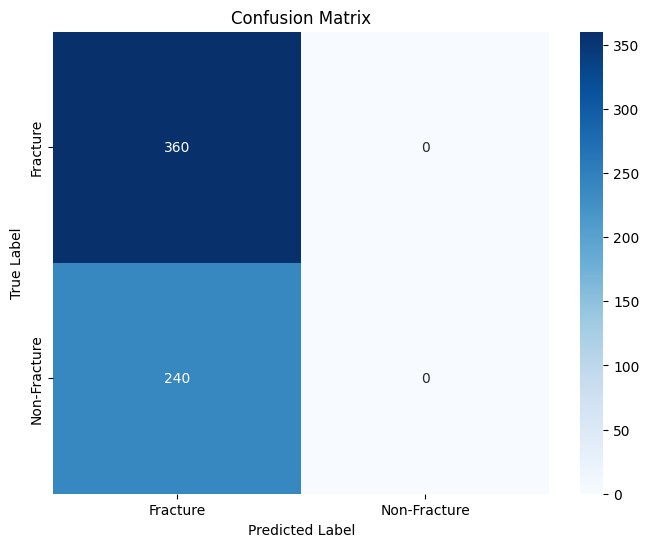

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get model predictions for the test dataset
y_pred = model.predict(Xtest)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fracture', 'Non-Fracture'], 
            yticklabels=['Fracture', 'Non-Fracture'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()